# Logistic Regression 

## import library

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [99]:
fname_data = 'assignment_08_data.csv'

data = np.genfromtxt(fname_data, delimiter=',')
num_data = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):

    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]

print(data.shape ,point_x.shape, point_y.shape,label.shape)


(600, 3) (600,) (600,) (600,)


## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [100]:
# (600,0)벡터를 return
def linear_regression(point_x,point_y,theta):
    temp = np.ones((3,point_x.shape[0]))
    temp[1] = point_x
    temp[2] = point_y

    value = (theta.reshape(1,3)@ temp ).reshape(point_x.shape[0],)
    
    return value


## define sigmoid function with input $x$

In [101]:
def sigmoid(value):
    z = 1 + np.exp(-value) 
    z = 1 / z
    
    return z
print(sigmoid(linear_regression(point_x, point_y, np.array([0,0,0]))))

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

## define loss function for the logistic regression

In [102]:
def compute_loss(theta,point_x,point_y,label,z):
     
    
    
    loss = np.sum( -label*np.log10(0.001+z) + ( label-1)*np.log10((1-z))) 
    return loss
                    

## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [103]:
def compute_gradient(point_x,point_y,theta,label,data,learning_rate,z):
    
    gradient = learning_rate * np.sum(data.T * (z-label), axis = 1)/data.shape[0]
    
    return gradient


## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [104]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate
theta           = np.array((0., 0., 0.))   # USE THIS VALUE for the initial condition of the model parameters

theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration = np.zeros(num_iteration)

## iterations for the gradient descent

In [105]:
for i in range(num_iteration):
    z = sigmoid(linear_regression(point_x,point_y,theta))
    
    theta = theta - compute_gradient(point_x,point_y,theta,label,data,learning_rate,z)
    loss = compute_loss(theta,point_x,point_y,label,z)
    
    theta_iteration[i] = theta
    loss_iteration[i] = loss
    
    if i %50 == 0:
        print("iteration = ",i,"theta = ",theta, "loss = ",loss)
        #print(compute_gradient(theta,data,label, learning_rate))



iteration =  0 theta =  [ 0.00353072 -0.00360356  0.00025   ] loss =  180.3576809390206
iteration =  50 theta =  [ 0.2945259  -0.2100719   0.01883774] loss =  503.67337340620327
iteration =  100 theta =  [ 0.67664694 -0.45628845  0.04241947] loss =  918.8973747433924
iteration =  150 theta =  [ 1.07329888 -0.71580109  0.06682275] loss =  1178.7828536899442
iteration =  200 theta =  [ 1.47358094 -0.97933226  0.09142708] loss =  1359.457201201066
iteration =  250 theta =  [ 1.87527801 -1.24434399  0.11611055] loss =  1516.0408925949305
iteration =  300 theta =  [ 2.27766252 -1.51000106  0.14083317] loss =  1664.1456247597118
iteration =  350 theta =  [ 2.68042368 -1.77597805  0.1655773 ] loss =  1809.1241600532203
iteration =  400 theta =  [ 3.08340872 -2.0421294   0.19033407] loss =  1952.7125355864746
iteration =  450 theta =  [ 3.48653572 -2.30838275  0.21509875] loss =  inf
iteration =  500 theta =  [ 3.88975782 -2.57469958  0.23986878] loss =  inf
iteration =  550 theta =  [ 4.29304

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


iteration =  2100 theta =  [ 16.80093439 -11.10663132   1.03331654] loss =  inf
iteration =  2150 theta =  [ 17.20442327 -11.37350315   1.0581209 ] loss =  inf
iteration =  2200 theta =  [ 17.60790999 -11.64038962   1.08292533] loss =  inf
iteration =  2250 theta =  [ 18.01139452 -11.90729062   1.1077298 ] loss =  inf
iteration =  2300 theta =  [ 18.41487683 -12.17420604   1.1325343 ] loss =  inf
iteration =  2350 theta =  [ 18.81835688 -12.44113576   1.15733882] loss =  inf
iteration =  2400 theta =  [ 19.22183467 -12.70807965   1.18214333] loss =  inf
iteration =  2450 theta =  [ 19.62531018 -12.97503755   1.20694782] loss =  inf
iteration =  2500 theta =  [ 20.02878341 -13.24200932   1.23175229] loss =  inf
iteration =  2550 theta =  [ 20.43225436 -13.50899479   1.25655671] loss =  inf
iteration =  2600 theta =  [ 20.83572302 -13.77599381   1.28136108] loss =  inf
iteration =  2650 theta =  [ 21.23918942 -14.04300619   1.30616539] loss =  inf
iteration =  2700 theta =  [ 21.64265356

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


## plot the results

In [106]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')


    plt.plot(np.arange(1,5001), loss_iteration, '-', color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [107]:
def plot_data(point_x, point_y,label):
    
    plt.figure(figsize=(8,8))

    plt.title('training data')
    
    color_arr = ['blue','red']
    
    c0x = np.array([])
    c0y = np.array([])
    c1x = np.array([])
    c1y = np.array([])
    
    for i in range(label.shape[0]):
        if label[i] == 0:
            c0x = np.append(c0x, np.array([point_x[i]]))
            c0y = np.append(c0y, np.array([point_y[i]]))
            
        else:
            c1x = np.append(c1x, np.array([point_x[i]]))
            c1y = np.append(c1y, np.array([point_y[i]]))
            
    plt.plot(c0x,c0y, '.', color = 'blue')
    plt.plot(c1x,c1y, '.', color = 'red')

    plt.axis('equal')
    plt.legend([ 'class=0','class = 1'])
    plt.tight_layout()
    plt.show()

In [108]:

def plot_model_parameter(theta):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    plt.plot(np.arange(1,5001),theta_iteration[:,0], '-', color = 'red')
    plt.plot(np.arange(1,5001),theta_iteration[:,1], '-', color = 'green')
    plt.plot(np.arange(1,5001),theta_iteration[:,2], '-', color = 'blue')

    plt.xlabel('iteration')
    plt.legend(['theta0', 'theta1', 'theta2'])

    plt.tight_layout()
    plt.show()

In [109]:
def plot_classifier(theta,point_x, point_y, label):
    
    xx = np.linspace(min(point_x), max(point_x),200)
    yy = np.linspace(min(point_y), max(point_y),200)
    mx, my = np.meshgrid(xx,yy)
    xxx = -(theta[0] + theta[1] * xx) / theta[2]
    
    plt.figure(figsize=(10,10))
    mz = sigmoid(-(theta[0] + theta[1] * mx + theta[2] * my))
    plt.contourf(mx,my,mz, 60, cmap="RdBu_r",vmin=0,vmax=1)
    
    c0x = np.array([])
    
    c0y = np.array([])
    c1x = np.array([])
    c1y = np.array([])
    
    for i in range(label.shape[0]):
        if label[i] == 0:
            c0x = np.append(c0x, np.array([point_x[i]]))
            c0y = np.append(c0y, np.array([point_y[i]]))
        else:
            c1x = np.append(c1x, np.array([point_x[i]]))
            c1y = np.append(c1y, np.array([point_y[i]]))
            
    plt.plot(xx, xxx, '-', color='black')
    plt.plot(c0x, c0y, 'o', color='blue')
    plt.plot(c1x, c1y, 'o', color='red')
   
    plt.axis('equal')
    plt.legend(['boundary', 'class = 0','class = 1'])
    plt.tight_layout()
    plt.colorbar()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data point in blue for class 0 and in red for class 1

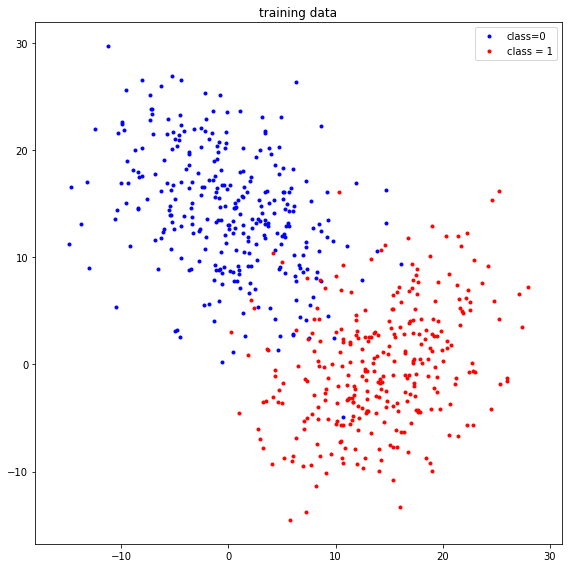

In [110]:
plot_data(point_x,point_y,label)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

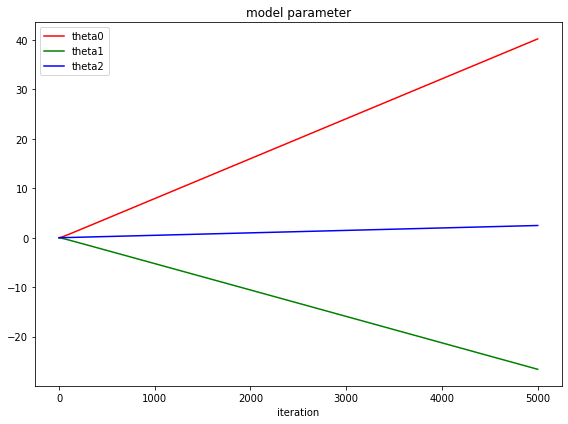

In [111]:
plot_model_parameter(theta)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

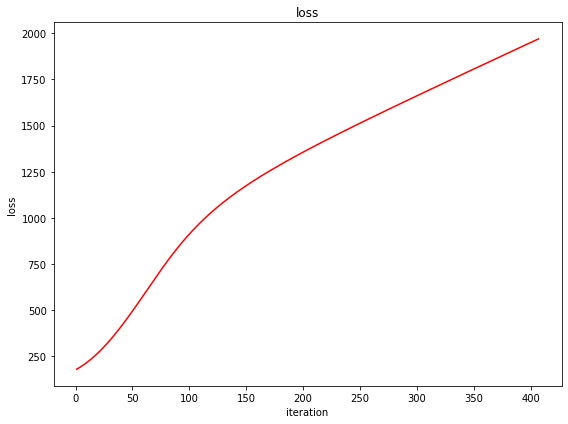

In [112]:
plot_loss_curve(loss_iteration)

### # 04. plot the classifier with the given data points superimposed

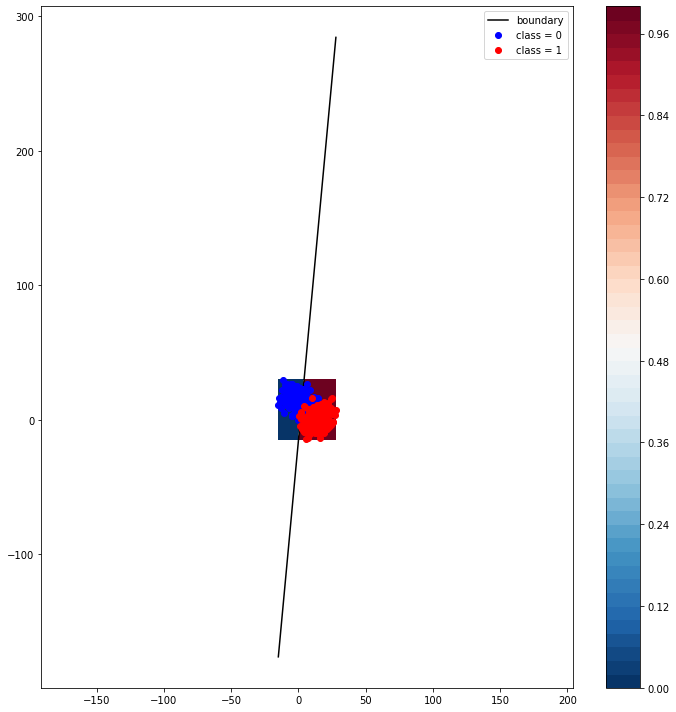

In [113]:
plot_classifier(theta,point_x, point_y, label)